# **TikTok Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

Your TikTok data team is still in the early stages of their latest project. So far, you’ve completed a project proposal and used Python to inspect and organize the TikTok dataset.

Orion Rainier, a Data Scientist at TikTok, is pleased with the work you have already completed and is requesting your assistance with some Exploratory Data Analysis (EDA) and data visualization. The management team asked to see a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help us understand the data. At the very least, include a graph comparing claim counts to opinion counts, as well as boxplots of the most important variables (like “video duration,” “video like count,” “video comment count,” and “video view count”) to check for outliers. Also, include a breakdown of “author ban status” counts.

Additionally, the management team has recently asked all EDA to include Tableau visualizations. Tableau visualizations are particularly helpful in status reports to the client and board members. For this data, create a Tableau dashboard showing a simple claims versus opinions count, as well as stacked bar charts of claims versus opinions for variables like video view counts, video like counts, video share counts, and video download counts. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director is a person with visual impairments.

You also notice a follow-up email from the Data Science Lead, Willow Jaffey. Willow suggests including an executive summary of your analysis to share with teammates.


# **Course 3 End-of-course project: Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs.


**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. Of particular interest is information related to what distinguishes claim videos from opinion videos.

**The goal** is to explore the dataset and create visualizations.
<br/>
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **Visualize a story in Tableau and Python**

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.


## **PACE: Plan**

Consider the questions in your PACE Strategy Document and those below where applicable to craft your response:
1. Identify any outliers:


*   What methods are best for identifying outliers?
*   How do you make the decision to keep or exclude outliers from any future models?



* Outlier can best be identified through descriptive statistics and visualization. An effective visualization chart for outlier detection is a boxplot-that provides a quick visual summary of the variability of values in a dataset. Boxplot can answer questions such as are there any outlier in the dataset?

* Decision about how to deal with outlier depends on many variables such as the size of the dataset compared to outlier, the distribution of the outlier.

### **Task 1. Imports, links, and loading**




In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

Then, load the dataset into a dataframe. Read in the data and store it as a dataframe object.



In [2]:
# Load dataset into dataframe
df = pd.read_csv("tiktok_dataset.csv")


## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code.

### **Task 2a: Data exploration and cleaning**

The first step is to assess your data. Check the Data Source page on Tableau Public to get a sense of the size, shape and makeup of the data set.


Consider the following questions as you work:

What do you do about missing data (if any)?

Are there data outliers?

In [3]:
# Display and examine the first few rows of the dataframe
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Get the size of the data
df.size

232584

In [5]:
# Get the shape of the data
df.shape

(19382, 12)

In [6]:
# Get basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
# Generate a table of descriptive statistics
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


### **Task 2c. Select visualization type(s)**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TikTok dataset. What type of data visualization(s) would be most helpful? Consider the distribution of the data.

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


* **Boxplot** will be helpful to visualize the spread and locality of group of values within quartile. It shows the distribution of *quantitative data* in a way that facilitates comparisons between variables or across levels of a categorical variable.

* **Histogram** shows the representation of a frequency distribution, which shows how frequently each value in a dataset or variable occurs. This will be helpful to visualize the numerical variables and provide answers to questions such as: what ranges does the observation covers? What is their central tendency? Are they heavily skewed to one direction? Is there evidence of bimodality?

* **Bar plot**: A bar plot represents an aggregate or statistical estimate for a numeric variable with the height of each rectangle and indicates the uncertainty around that estimate using an error bar. 


## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Build visualizations**

Now that you have assessed your data, it’s time to plot your visualization(s).

#### **video_duration_sec**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

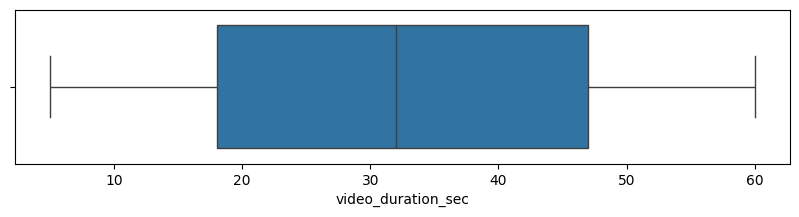

In [ ]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(10,2))
sns.boxplot(df, x="video_duration_sec");

Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

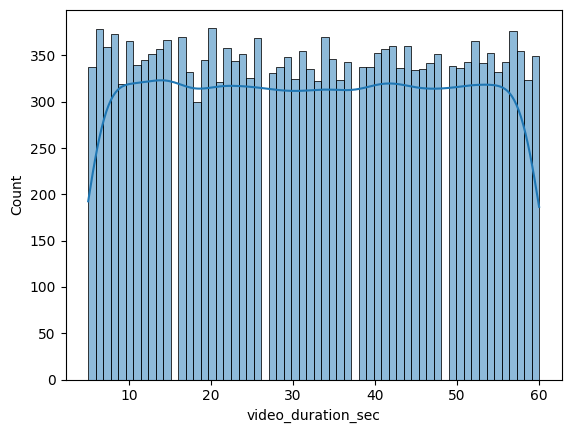

In [ ]:
# Create a histogram
sns.histplot(x=df["video_duration_sec"], bins=60, kde=True);

**Question:** What do you notice about the duration and distribution of the videos?

* The duration of videos ranges from 4 to 60 seconds, with a median value of approximately 32 seconds. Notably, there are no outlier values in the dataset, indicating a consistent range of video lengths.

* The distribution of video duration is not normally distributed, but there is an even spread of videos of different lengths. This variety suggests a balanced representation of short and long videos within the dataset.



#### **video_view_count**

Create a box plot to examine the spread of values in the `video_view_count` column.

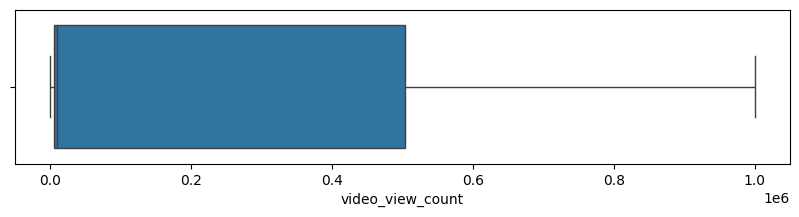

In [11]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(10,2))
sns.boxplot(x=df["video_view_count"])
plt.show()

Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

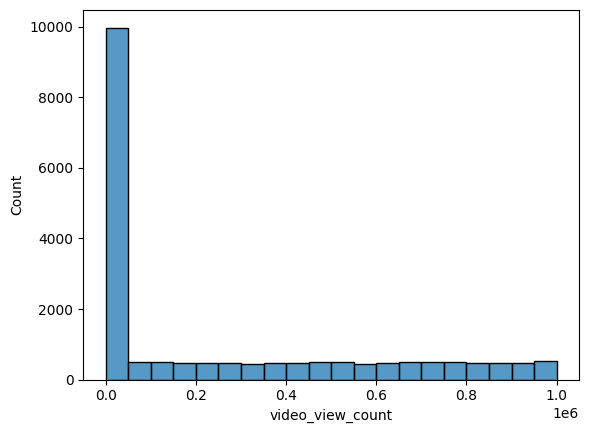

In [13]:
# Create a histogram
sns.histplot(x=df["video_view_count"], bins=20);

**Question:** What do you notice about the distribution of this variable?
* The histogram reveals an extreme right skew in the distribution of video view counts, indicating that most videos in the dataset have lower view counts.
* The boxplot shows that the median value is closer to the first quartile, which is near zero, suggesting that a significant portion of the videos have very low view counts.
* The whisker extending to the right in the boxplot indicates a long tail of high view counts, meaning there are a few videos with exceptionally high views compared to the rest.


This distribution suggests a significant disparity in the popularity of videos, where a small number of videos garner a disproportionately large number of views.



#### **video_like_count**

Create a box plot to examine the spread of values in the `video_like_count` column.

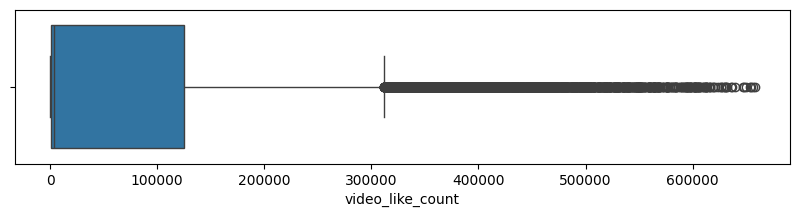

In [15]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(10,2))
sns.boxplot(x=df["video_like_count"])
plt.show()


Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

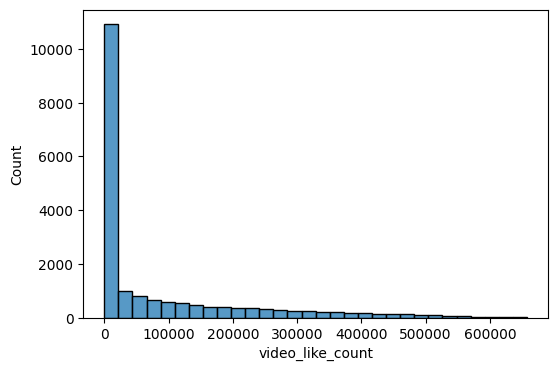

In [16]:
# Create a histogram
plt.figure(figsize=(6,4))
sns.histplot(x=df["video_like_count"], bins=30);

**Question:** What do you notice about the distribution of this variable?
* The distribution follows a similar pattern to the video_view_count, but with additional outliers. The boxplot reveals that the median like count is close to zero, indicating that a majority of the videos have very few likes. Videos with like counts greater than 300,000 are considered outliers.

* The histogram displays an extreme right skew in the distribution of video_like_count, suggesting that most videos have relatively low like counts. This is further evidenced by the long tail of high like counts in the distribution, indicating a small number of videos with exceptionally high likes.

Overall, this distribution highlights the disparity in engagement, where a few videos receive a disproportionately high number of likes compared to the majority.



#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

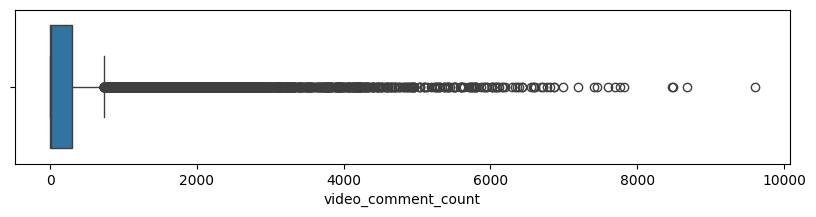

In [17]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(10,2))
sns.boxplot(x=df["video_comment_count"])
plt.show()

Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

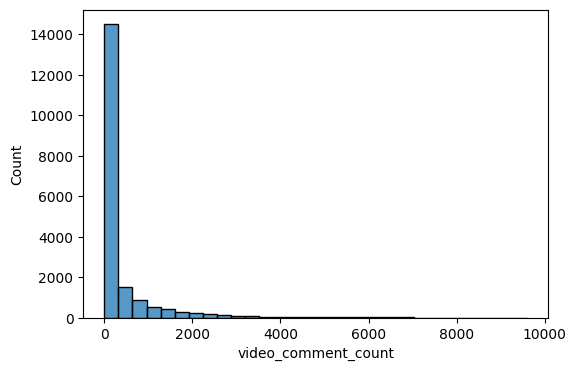

In [18]:
# Create a histogram
plt.figure(figsize=(6,4))
sns.histplot(x=df["video_comment_count"], bins=30);

**Question:** What do you notice about the distribution of this variable?
* From the boxplot and histogram, I observed that the distribution of video comment counts is extremely right-skewed, with the median value being close to zero. This indicates that most videos have very few comments. The boxplot also reveals the presence of outlier values, suggesting that there are some videos with exceptionally high comment counts compared to the majority. Overall, most videos tend to receive relatively low engagement in terms of comments.



#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column.

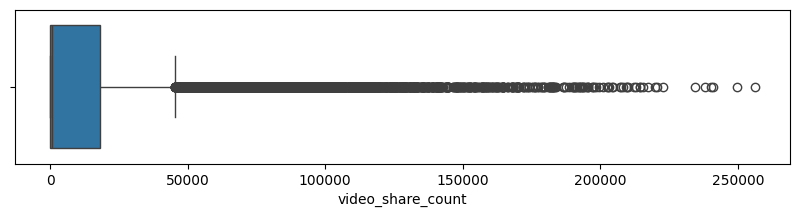

In [19]:
# Create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(10,2))
sns.boxplot(x=df["video_share_count"])
plt.show()

*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

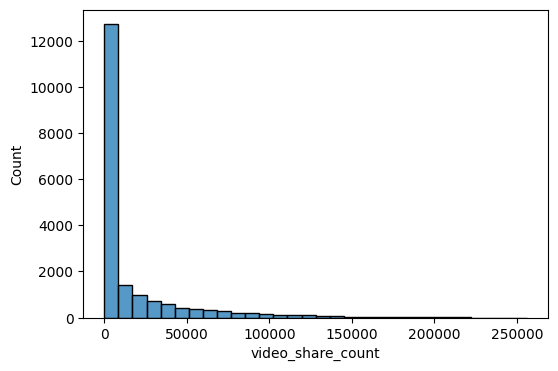

In [21]:
# Create a histogram
plt.figure(figsize=(6,4))
sns.histplot(x=df["video_share_count"], bins=30);

**Question:** What do you notice about the distribution of this variable?
* A similar pattern observed in the distribution of video comment counts can be seen here as well. The distribution is extremely right-skewed, indicating that most videos have low counts, while a few videos have significantly higher counts, identified as outliers.



#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

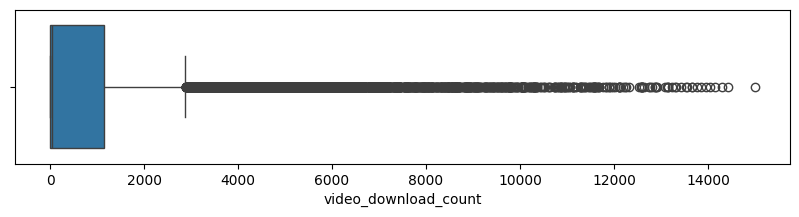

In [22]:
# Create a boxplot to visualize distribution of `video_download_count`
plt.figure(figsize=(10,2))
sns.boxplot(x=df["video_download_count"])
plt.show()

Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

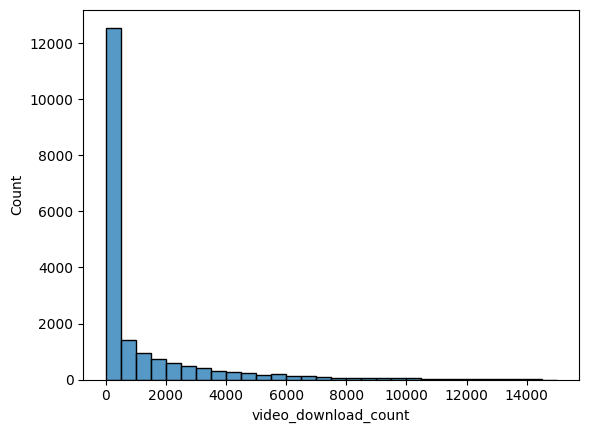

In [23]:
# Create a histogram
sns.histplot(x=df["video_download_count"], bins=30);

**Question:** What do you notice about the distribution of this variable?
* The distribution of the video download count reveals that the median value is close to zero, indicating that the majority of videos are downloaded very few times. The histogram shows a long tail of values, highlighting the presence of outliers with significantly higher download counts. Most videos have been downloaded less than 200 times, suggesting that high download counts are relatively rare compared to the overall dataset.



#### **Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

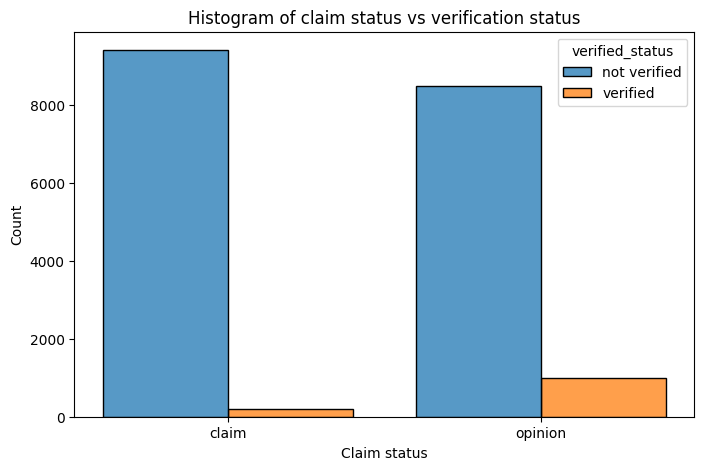

In [24]:
# Create a histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="claim_status", hue="verified_status", shrink=0.8, multiple="dodge")
plt.title("Histogram of claim status vs verification status")
plt.xlabel("Claim status");

**Question:** What do you notice about the number of verified users compared to unverified? And how does that affect their likelihood to post opinions?

* The number of videos by verified users is less compared to the number of videos by unverified users.

* The chart indicates that verified users tend to post more opinion videos compared to videos with claims.

This trend suggests that verified users may have a higher tendency to share their opinions rather than make claims, which could be due to their trustworthiness and the audience’s expectation for credible insights. On the other hand, unverified users might feel less constrained and more inclined to post claim videos, possibly due to fewer repercussions or less accountability.



#### **Claim status by author ban status**

The previous course used a `groupby()` statement to examine the count of each claim status for each author ban status. Now, use a histogram to communicate the same information.

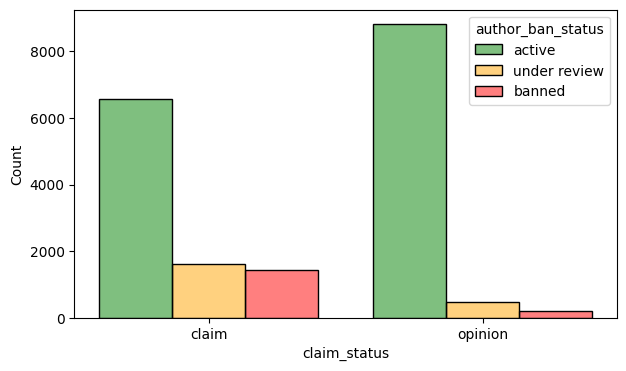

In [25]:
# Create a histogram
plt.figure(figsize=(7,4))
sns.histplot(df, x="claim_status", hue="author_ban_status", multiple="dodge",
            hue_order=["active", "under review", "banned"],
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
            shrink=0.8,
            alpha=0.5)
plt.show()


**Question:** What do you notice about the number of active authors compared to banned authors for both claims and opinions?

* The number of active authors is higher compared to banned authors for both claims and opinions statuses.

* Notably, there are more active authors and fewer banned authors in the opinion status category, indicating that active authors are more likely to post opinion videos.

This trend suggests that active authors, who are likely adhering to platform guidelines, contribute more consistently across both categories, while banned authors, perhaps due to the nature of their content, have fewer contributions, especially in the opinion category.

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

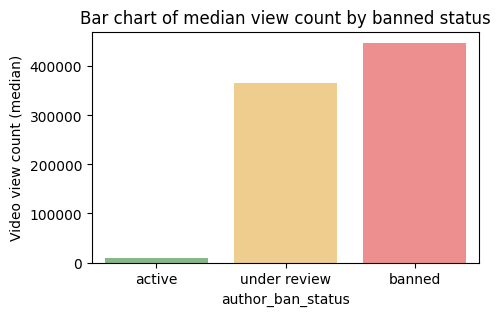

In [28]:
# Create a bar plot
plt.figure(figsize=(5,3))
sns.barplot(df , x="author_ban_status", y="video_view_count",hue= "author_ban_status",
            estimator="median", errorbar=None, order=["active", "under review", "banned"],palette={'active':'green', 'under review':'orange', 'banned':'red'}, alpha=0.5)
plt.title("Bar chart of median view count by banned status")
plt.ylabel("Video view count (median)")
plt.show()

**Question:** What do you notice about the median view counts for non-active authors compared to that of active authors? Based on that insight, what variable might be a good indicator of claim status?

* The median view counts for non-active authors are significantly higher than those for active authors. This suggests that non-active authors, who are more likely to post claims, receive more views overall compared to active authors. Given this observation, video_view_count could be a strong indicator of claim status.

* A quick verification of the median view count by claim status supports this assessment, indicating that video_view_count is indeed a useful variable for distinguishing between claim and opinion videos. This insight can help in developing more accurate models for identifying and categorizing video content based on its engagement metrics.



In [29]:
# Calculate the median view count for claim status.
median_view_count_for_claim = df.groupby(["claim_status"])["video_view_count"].median()
median_view_count_for_claim

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

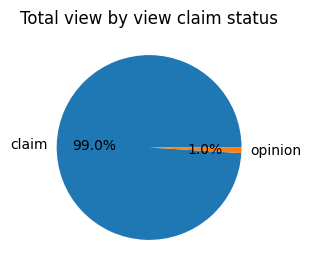

In [35]:
# Create a pie graph
plt.figure(figsize=(3,3))
plt.pie(df.groupby(["claim_status"])["video_view_count"].sum(), labels=["claim", "opinion"],
         autopct='%.1f%%')
plt.title("Total view by view claim status");

In [33]:
df["claim_status"].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

**Question:** What do you notice about the overall view count for claim status?

* The overall view count is overwhelmingly dominated by claim videos, accounting for 99% of the total views, even though the number of claim and opinion videos in the dataset is roughly equal. This indicates that claim videos attract significantly more attention and engagement compared to opinion videos, likely due to their potentially controversial or sensational content, which tends to drive more views.



### **Task 4. Determine outliers**

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. You've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.


In [36]:
###video_share_count
count_variables = ["video_view_count", "video_like_count", 
                   "video_share_count", "video_download_count", "video_comment_count"]

for _, col in enumerate(count_variables):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    median = df[col].median()
    outlier_threshold = median + 1.5*IQR
    # Count the number of values that exceed the outlier threshold
    outlier_count = (df[col] > outlier_threshold).sum()
    print(f"Number of outliers, {col}: {outlier_count}")
    
    

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


#### **Scatterplot**

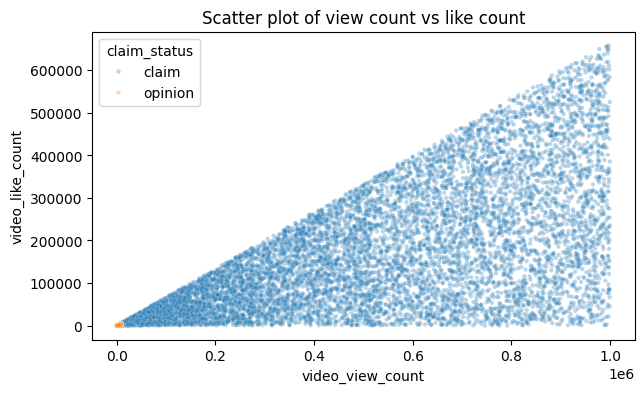

In [37]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
plt.figure(figsize=(7,4))
sns.scatterplot(df, x="video_view_count", y="video_like_count", hue="claim_status",
               s=10, alpha=.3)
plt.title("Scatter plot of view count vs like count");

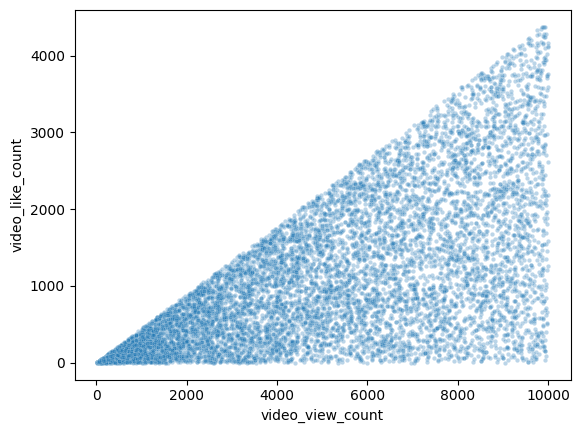

In [39]:
# Create a scatterplot of ``video_view_count` versus `video_like_count` for opinions only
opinion = df[df['claim_status']=='opinion']
sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"],
                 s=10, alpha=.3)
plt.show()


## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 5. Conclusion**
*Make it professional and presentable*

You have visualized the data you need to share with the director now. Remember, the goal of a data visualization is for an audience member to glean the information on the chart in mere seconds.

*Questions to ask yourself for reflection:*
Why is it important to conduct Exploratory Data Analysis? What other visuals could you create?


EDA is important because ...

* *EDA helps a data professional to get to know the data, understand its outliers, clean its missing values, and prepare it for future modeling.*

Visualizations helped me understand ..

* *That we will need to make decisions on certain considerations prior to designing a model. (for example, what to do with outliers, duplicate values, or missing data)*


You’ve now completed a professional data visualization according to a business need. Well done! Be sure to save your work as a reference for later work in Tableau.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.